<a href="https://colab.research.google.com/github/FatimahAnimashaun/Medical-Appointment-Analysis/blob/main/Medical_Appointment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [ ]:
df = pd.read_csv('Medical Appointment (No Show).csv')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
#Check for missing values

df.isna().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [ ]:
#Adjust column names

df.columns = pd.Series(df.columns).apply(lambda x: x.lower().replace('-', '_').replace('day', '_day'))

In [ ]:
#Correct the spelling of 'hypertension'

df.rename(columns={'hipertension':'hypertension', 'no_show': 'show'}, inplace=True)

df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'show'],
      dtype='object')

In [ ]:
#Remove non useful columns

df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'show'],
      dtype='object')

In [ ]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.show = df.show.apply(lambda x: 'Yes' if x == 'No' else 'No')

df.sample(10)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
77725,F,2016-05-13T07:10:02Z,2016-05-30T00:00:00Z,18,BARRO VERMELHO,0,0,0,0,0,1,Yes
81872,M,2016-05-30T07:13:52Z,2016-05-30T00:00:00Z,14,ITARARÉ,0,0,0,0,0,0,Yes
30472,F,2016-04-29T11:11:03Z,2016-05-31T00:00:00Z,15,CENTRO,0,0,0,0,0,1,No
21831,F,2016-05-18T06:36:06Z,2016-05-20T00:00:00Z,39,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes
94129,M,2016-04-20T08:46:34Z,2016-06-01T00:00:00Z,23,TABUAZEIRO,0,0,0,0,0,1,Yes
25889,F,2016-04-27T10:59:43Z,2016-05-11T00:00:00Z,27,ESTRELINHA,1,0,0,0,0,1,Yes
61049,M,2016-05-30T07:15:38Z,2016-05-30T00:00:00Z,54,JOANA D´ARC,0,1,0,0,0,0,Yes
35882,F,2016-05-20T07:14:23Z,2016-05-31T00:00:00Z,29,BONFIM,0,0,0,0,0,1,Yes
12444,F,2016-05-17T17:42:42Z,2016-05-31T00:00:00Z,23,MONTE BELO,0,0,0,0,0,1,Yes
52509,F,2016-04-13T14:19:15Z,2016-05-11T00:00:00Z,23,JESUS DE NAZARETH,0,0,0,0,0,1,Yes


In [ ]:
df.iloc[:,[5,6,7,8,10]].nunique()

,0
scholarship,2
hypertension,2
diabetes,2
alcoholism,2
sms_received,2


In [ ]:
#Changing 0 and 1 ints to 'Yes' and 'No'

def change_01_to_str_eq(x):
    return 'Yes' if x == 1 else 'No'

target_columns = df.iloc[:,[5,6,7,8,10]].columns

for column in target_columns:
    df[column] = df[column].apply(change_01_to_str_eq)

df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,0,No,Yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,0,No,Yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,0,No,Yes
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,Yes


In [ ]:
df.dtypes

,0
gender,object
scheduled_day,object
appointment_day,object
age,int64
neighbourhood,object
scholarship,object
hypertension,object
diabetes,object
alcoholism,object
handcap,int64


In [ ]:
df.describe()

,age,handcap
count,110527.000000,110527.000000
mean,37.088874,0.022248
std,23.110205,0.161543
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,4.000000


In [ ]:
#From the above statistics, we can see the minimum age is -1 which is not possible

age_df = df.drop(df[df.age <= -1].index, axis=0)

age_df[age_df.age <= -1]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show


In [ ]:
age_df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

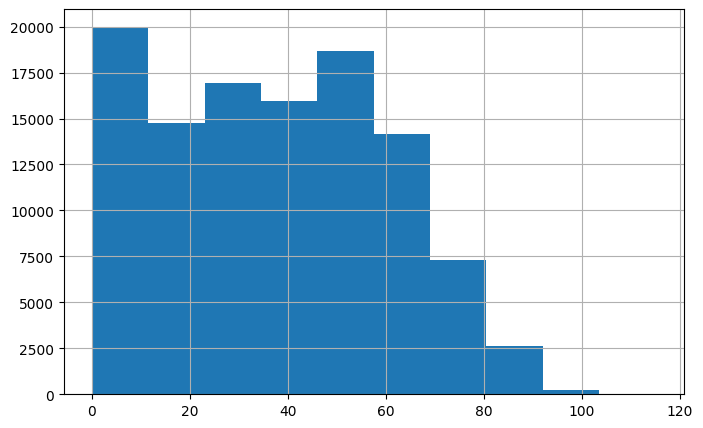

In [ ]:
age_df.age.hist(figsize=(8,5));

In [ ]:
#Grouping age range

def group_age(x):
    if x <= 14:
        return 'child'
    if x > 14 and x <= 24:
        return 'youth'
    if x > 24 and x <= 64:
        return 'adult'
    if x > 64:
        return 'senior'

age_df['age_group'] = age_df.age.apply(group_age)

age_df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes,adult
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,0,No,Yes,adult
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,0,No,Yes,adult
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,0,No,Yes,child
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,Yes,adult


In [ ]:
#Totals in age groups

groups = age_df.age_group.unique()
group_totals = {group: age_df[age_df.age_group == group]['age'].size for group in groups}

group_totals

{'adult': 58857, 'child': 23257, 'senior': 14402, 'youth': 14010}

In [ ]:
#Group dataset of the age groups

age_group_df = age_df.groupby(['show', 'age_group'], as_index=False)['age'].count()

#rename column for semantics

age_group_df.rename(columns={'age':'ind_count'}, inplace=True)

#calculate proportion function

def calc_prop(x):
    return round((x.ind_count/group_totals[x.age_group]) * 100, 2)

age_group_df['%_of_total'] = age_group_df.apply(calc_prop, axis=1)

age_group_df

,show,age_group,ind_count,%_of_total
0,No,adult,11620,19.74
1,No,child,4926,21.18
2,No,senior,2233,15.50
3,No,youth,3540,25.27
4,Yes,adult,47237,80.26
5,Yes,child,18331,78.82
6,Yes,senior,12169,84.50
7,Yes,youth,10470,74.73


In [ ]:
#This function displays value above bar chart bars

def bar_height_text(df):
    for i in range(len(df['%_of_total'])):
        plt.text(i, df['%_of_total'].iloc[i] + 1, df['%_of_total'].iloc[i], ha='center')

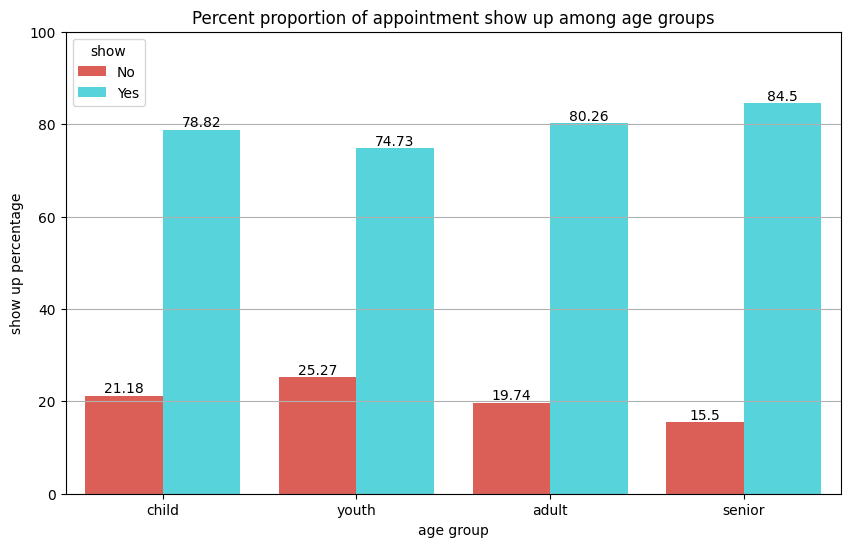

In [ ]:
#plot for group and proportion

plt.figure(figsize=(10,6))
plt.ylim(0,100)

ax = sns.barplot(x='age_group', y='%_of_total',
                        hue='show',
                        data=age_group_df,
                        palette='hls',
                        order=['child', 'youth', 'adult', 'senior'],
                        capsize=0.05,
                        saturation=8)

plt.xlabel('age group')
plt.ylabel('show up percentage')
plt.title('Percent proportion of appointment show up among age groups')
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

From the above analysis, we observed that Senior Age groups show more to appointment, while we can see the Youth has a high percentage of not showing up to appointments

In [ ]:
# gender totals
total_male = df[df.gender == 'M']['gender'].size
total_female = df[df.gender == 'F']['gender'].size

gender_grouped_df = df.groupby(['gender', 'show'], as_index=False).count().iloc[:,:3]
gender_grouped_df.rename(columns={'scheduled_day':'count'}, inplace=True)

# Calculate proportion and add the percentage column
gender_grouped_df['%_of_total'] = gender_grouped_df.apply(lambda x: round((x['count']/total_female) * 100, 2) if x['gender'] == 'F' else round((x['count']/total_male) * 100, 2), axis=1)


#make gender label more intuitive
gender_grouped_df['gender'] = gender_grouped_df['gender'].apply(lambda x: 'Female' if x == 'F' else 'Male')

gender_grouped_df

,gender,show,count,%_of_total
0,Female,No,14594,20.31
1,Female,Yes,57246,79.69
2,Male,No,7725,19.97
3,Male,Yes,30962,80.03


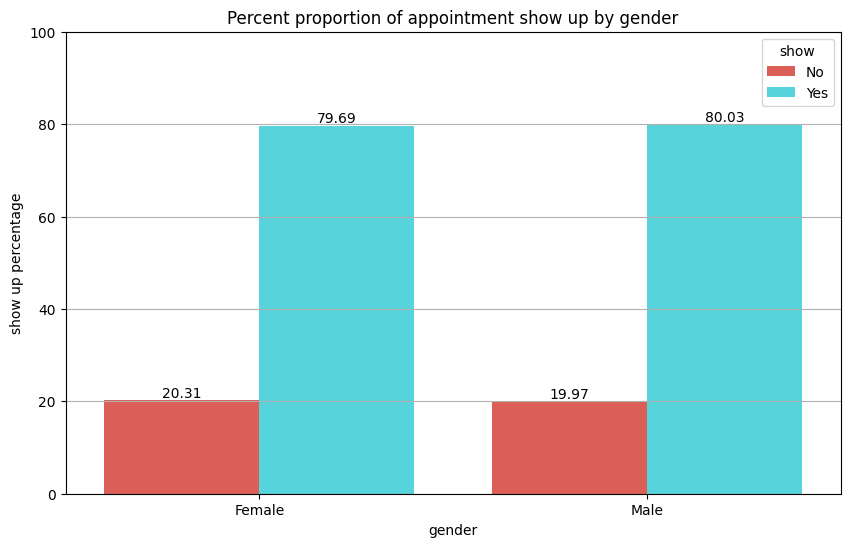

In [ ]:
plt.figure(figsize=(10,6))
plt.ylim(0,100)

ax = sns.barplot(x='gender', y='%_of_total',
                        hue='show',
                        data=gender_grouped_df,
                        palette='hls',
                        capsize=0.05,
                        saturation=8)

plt.xlabel('gender')
plt.ylabel('show up percentage')
plt.title('Percent proportion of appointment show up by gender')
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

From the above analysis, we can see that there's a high percentage of Male that show up for appointments

In [ ]:
#Add weekday column
""" This function converts a date type string into a day of the week returns str -> eg 'Friday' """
def convert_day_name(d):
    new_date = pd.Timestamp(d)
    return new_date.day_name()

convert_day_name("2016-04-29T00:00:00Z")

'Friday'

In [ ]:
# Create day of the week column
df['ap_day_of_week'] = df.appointment_day.apply(convert_day_name)

df.sample(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,ap_day_of_week
40474,M,2016-05-19T11:19:24Z,2016-05-19T00:00:00Z,6,SANTA MARTHA,No,No,No,No,0,No,Yes,Thursday
17592,F,2016-04-28T07:45:46Z,2016-05-11T00:00:00Z,45,JESUS DE NAZARETH,No,Yes,No,No,0,No,Yes,Wednesday
70131,F,2016-05-20T14:05:14Z,2016-05-20T00:00:00Z,45,ITARARÉ,No,No,No,No,0,No,Yes,Friday
45688,M,2016-05-10T11:21:37Z,2016-05-10T00:00:00Z,22,CENTRO,No,No,No,No,0,No,Yes,Tuesday
104729,F,2016-05-24T18:22:54Z,2016-06-01T00:00:00Z,33,SANTOS DUMONT,Yes,No,No,No,0,Yes,No,Wednesday


In [ ]:
#Group by appointment day of the week

day_group_df = df.groupby(['ap_day_of_week', 'show'], as_index=False)['age'].count()

# rename 'age'

day_group_df.rename(columns={'age':'show_count'}, inplace=True)

day_group_df

,ap_day_of_week,show,show_count
0,Friday,No,4037
1,Friday,Yes,14982
2,Monday,No,4690
3,Monday,Yes,18025
4,Saturday,No,9
5,Saturday,Yes,30
6,Thursday,No,3338
7,Thursday,Yes,13909
8,Tuesday,No,5152
9,Tuesday,Yes,20488


In [ ]:
day_totals = {day: df[df['ap_day_of_week'] == day]['age'].size for day in day_group_df['ap_day_of_week']}

day_totals

{'Friday': 19019,
 'Monday': 22715,
 'Saturday': 39,
 'Thursday': 17247,
 'Tuesday': 25640,
 'Wednesday': 25867}

In [ ]:
#calculate proportion function and add percentage column
def calc_prop(x):
    return round((x.show_count/day_totals[x.ap_day_of_week]) * 100, 2)

day_group_df['%_of_total'] = day_group_df.apply(calc_prop, axis=1)

day_group_df

,ap_day_of_week,show,show_count,%_of_total
0,Friday,No,4037,21.23
1,Friday,Yes,14982,78.77
2,Monday,No,4690,20.65
3,Monday,Yes,18025,79.35
4,Saturday,No,9,23.08
5,Saturday,Yes,30,76.92
6,Thursday,No,3338,19.35
7,Thursday,Yes,13909,80.65
8,Tuesday,No,5152,20.09
9,Tuesday,Yes,20488,79.91


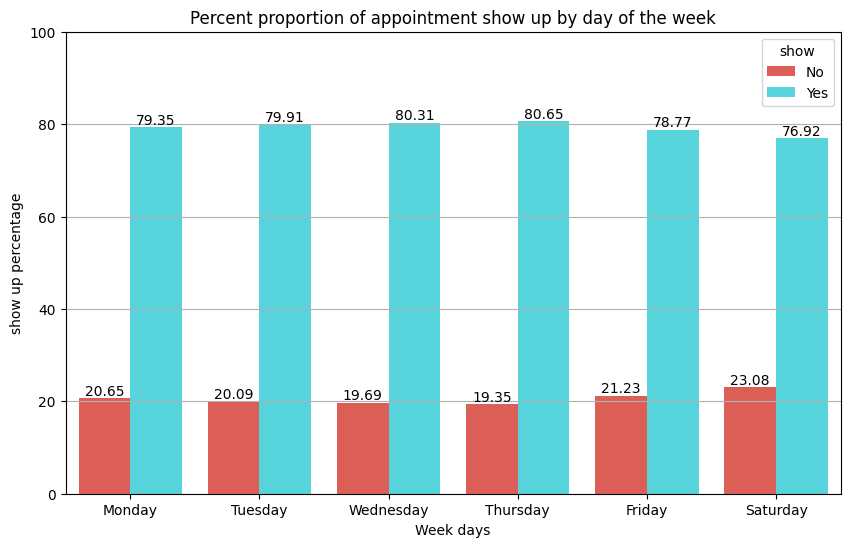

In [ ]:
plt.figure(figsize=(10,6))
plt.ylim(0,100)

#plot
ax = sns.barplot(x='ap_day_of_week', y='%_of_total',
                        hue='show',
                        data=day_group_df,
                        palette='hls',
                        order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                        capsize=0.05,
                        saturation=8)

plt.xlabel('Week days')
plt.ylabel('show up percentage')
plt.title('Percent proportion of appointment show up by day of the week')
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

Base on the above analysis, we can see people come for their appointments more on Thursdays and Wednesdays

In [ ]:
# Recieved sms and showed up grouped
sms_group_df = df.groupby(['sms_received', 'show'], as_index=False).age.count()

sms_group_df

,sms_received,show,age
0,No,No,12535
1,No,Yes,62510
2,Yes,No,9784
3,Yes,Yes,25698


In [ ]:
#get totals

received_total = sms_group_df[sms_group_df.sms_received == 'Yes']['age'].sum()

no_received_total = sms_group_df[sms_group_df.sms_received == 'No']['age'].sum()

totals = {'Yes': received_total, 'No': no_received_total}

totals

{'Yes': 35482, 'No': 75045}

In [ ]:
# add percent proportion column
sms_group_df['%_of_total'] = sms_group_df.apply(lambda x: round(x.age/totals[x.sms_received], 2) * 100, axis=1)

sms_group_df

,sms_received,show,age,%_of_total
0,No,No,12535,17.0
1,No,Yes,62510,83.0
2,Yes,No,9784,28.0
3,Yes,Yes,25698,72.0


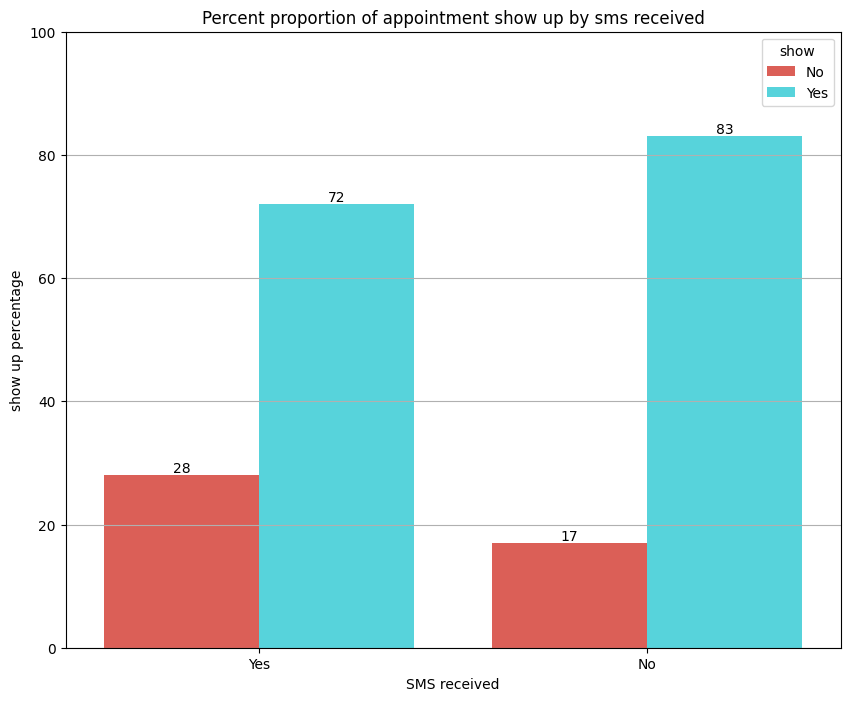

In [ ]:
labels = ['Receive', 'Not received']

plt.figure(figsize=(10,8))
plt.ylim(0,100)
plt.grid(axis='y')

#plot
ax = sns.barplot(x='sms_received', y='%_of_total',
                        hue='show',
                        palette='hls',
                        data=sms_group_df,
                        order = ['Yes', 'No'],
                        capsize=0.05,
                        saturation=8)

plt.xlabel('SMS received')
plt.ylabel('show up percentage')
plt.title('Percent proportion of appointment show up by sms received')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

It is observed that the percentage of people that did not receive sms but still showed for their appointments is high, which suggests sms reminders did not really have influence people showing up for their appointments.

In [ ]:
# Add duration column that show the between contact and the appointment
df['contact_duration'] = pd.to_datetime(df['appointment_day']) - pd.to_datetime(df['scheduled_day'])

df['contact_duration'] = df['contact_duration'].apply(lambda x: x.days)
df['contact_duration'].describe()

,contact_duration
count,110527.000000
mean,9.183702
std,15.254996
min,-7.000000
25%,-1.000000
50%,3.000000
75%,14.000000
max,178.000000


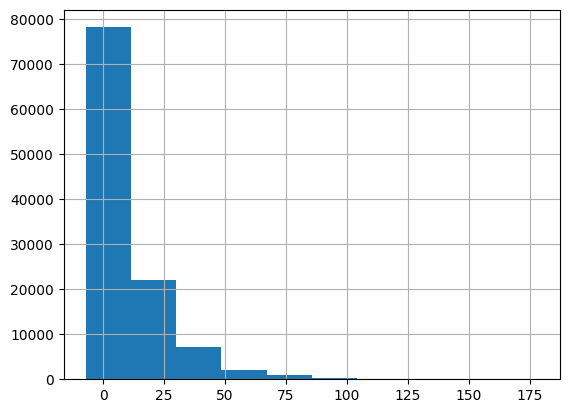

In [ ]:
df['contact_duration'].hist();

In [ ]:
df.contact_duration[df.contact_duration < 0 ].min()

-7

In [ ]:
df_filter_bad_duration = df.drop(df[df.contact_duration < 0 ].index)

df_filter_bad_duration.contact_duration.describe()

,contact_duration
count,71959.000000
mean,14.642018
std,16.494334
min,0.000000
25%,3.000000
50%,8.000000
75%,21.000000
max,178.000000


In [ ]:
# group duration values
def group_duration(x):
    """Labels the interval of int x"""
    if x <= 1:
        return '1 day'
    if x > 1 and x <= 7:
        return '1 week'
    if x > 7 and x <= 14:
        return '2 weeks'
    if x > 14 and x <= 21:
        return '3 weeks'
    if x > 21 and x <= 28:
        return '1 month'
    if x > 28 and x <= 56:
        return '2 months'
    if x > 56:
        return '3 months and above'

In [ ]:
# group and label duration
df_filter_bad_duration['duration_label'] = df_filter_bad_duration['contact_duration'].apply(group_duration)

df_filter_bad_duration.sample(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,ap_day_of_week,contact_duration,duration_label
11873,F,2016-05-04T07:47:13Z,2016-05-06T00:00:00Z,47,REDENÇÃO,No,No,No,Yes,0,No,No,Friday,1,1 day
104931,M,2016-05-24T16:35:44Z,2016-06-01T00:00:00Z,70,ANDORINHAS,No,No,No,Yes,3,No,Yes,Wednesday,7,1 week
62693,F,2016-05-02T18:32:00Z,2016-05-04T00:00:00Z,65,JARDIM CAMBURI,No,No,No,No,0,No,Yes,Wednesday,1,1 day
56998,F,2016-05-09T11:17:43Z,2016-05-16T00:00:00Z,43,PRAIA DO SUÁ,No,No,No,No,0,No,Yes,Monday,6,1 week
55000,M,2016-04-26T08:18:59Z,2016-05-19T00:00:00Z,71,DA PENHA,No,Yes,No,No,0,No,No,Thursday,22,1 month


In [ ]:
#Totals of duration grouping

duration_labels = df_filter_bad_duration.duration_label.value_counts().index
duration_count_totals = {label: df_filter_bad_duration[df_filter_bad_duration.duration_label == label].shape[0] for label in duration_labels}

duration_count_totals

{'1 week': 22579,
 '1 day': 11938,
 '2 weeks': 11196,
 '2 months': 8714,
 '3 weeks': 8544,
 '1 month': 6620,
 '3 months and above': 2368}

In [ ]:
# duration and show up grouping
duration_group_df = df_filter_bad_duration.groupby(['duration_label', 'show'], as_index=False)['contact_duration'].count()

# Rename last column for clarity
duration_group_df.rename(columns={'contact_duration': 'dur_count'}, inplace=True)

duration_group_df

,duration_label,show,dur_count
0,1 day,No,2715
1,1 day,Yes,9223
2,1 month,No,2209
3,1 month,Yes,4411
4,1 week,No,5727
5,1 week,Yes,16852
6,2 months,No,2916
7,2 months,Yes,5798
8,2 weeks,No,3496
9,2 weeks,Yes,7700


In [ ]:
# percentage calc function
def calc_prop(x):
    return round((x.dur_count/duration_count_totals[x.duration_label]) * 100, 2)

# Add a percentage column

duration_group_df['%_of_total'] = duration_group_df.apply(calc_prop, axis=1)

duration_group_df

,duration_label,show,dur_count,%_of_total
0,1 day,No,2715,22.74
1,1 day,Yes,9223,77.26
2,1 month,No,2209,33.37
3,1 month,Yes,4411,66.63
4,1 week,No,5727,25.36
5,1 week,Yes,16852,74.64
6,2 months,No,2916,33.46
7,2 months,Yes,5798,66.54
8,2 weeks,No,3496,31.23
9,2 weeks,Yes,7700,68.77


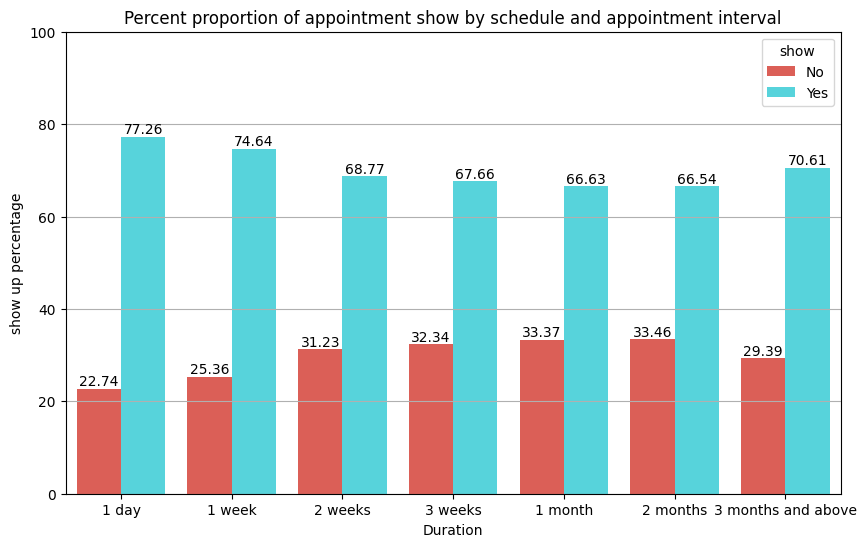

In [ ]:
#plot
plt.figure(figsize=(10,6))
plt.ylim(0,100)

ax = sns.barplot(x='duration_label', y='%_of_total',
                        hue='show',
                        palette='hls',
                        data=duration_group_df,
                        order = ['1 day', '1 week', '2 weeks', '3 weeks', '1 month', '2 months', '3 months and above'],
                        capsize=0.05,
                        saturation=8)

plt.xlabel('Duration')
plt.ylabel('show up percentage')
plt.title('Percent proportion of appointment show by schedule and appointment interval')
plt.grid(axis='y')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()


From this analysis, we can see that appointments schedules for a less or less have the greater chanced of been fulfilled.

In [ ]:
# group base on ailments
hyp_group_df = df.groupby(['hypertension', 'show'], as_index=False)['age'].count()
diab_group_df = df.groupby(['diabetes', 'show'], as_index=False)['age'].count()
alc_group_df = df.groupby(['alcoholism', 'show'], as_index=False)['age'].count()

# group individual elements based on showing up status

# hypertensive patients

hyp_show = hyp_group_df[(hyp_group_df.hypertension == 'Yes') & (hyp_group_df.show == 'Yes')].iloc[0, 2]
hyp_no_show = hyp_group_df[(hyp_group_df.hypertension == 'Yes') & (hyp_group_df.show == 'No')].iloc[0, 2]

# diabetic patients

diab_show = diab_group_df[(diab_group_df.diabetes == 'Yes') & (diab_group_df.show == 'Yes')].iloc[0, 2]
diab_no_show = diab_group_df[(diab_group_df.diabetes == 'Yes') & (diab_group_df.show == 'No')].iloc[0, 2]

#alcoholic patients

alc_show = alc_group_df[(alc_group_df.alcoholism == 'Yes') & (alc_group_df.show == 'Yes')].iloc[0, 2]
alc_no_show = alc_group_df[(alc_group_df.alcoholism == 'Yes') & (alc_group_df.show == 'No')].iloc[0, 2]

In [ ]:
# Values for plots
hyp_sizes = [hyp_show, hyp_no_show]
hyp_labels = ['show', 'no show']

diab_sizes = [diab_show, diab_no_show]
diab_labels = ['show', 'no show']

alc_sizes = [alc_show, alc_no_show]
alc_labels = ['show', 'no show']

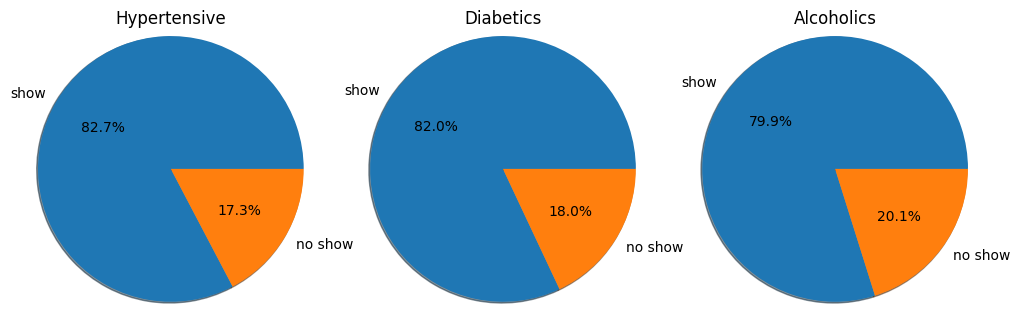

In [ ]:
#plots
fig1, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,8))
ax1.pie(hyp_sizes, labels=hyp_labels, autopct='%1.1f%%', shadow=True, radius=3)
ax1.set_title('Hypertensive', pad=65)


ax2.pie(diab_sizes, labels=diab_labels, autopct='%1.1f%%', shadow=True, radius=3)
ax2.set_title('Diabetics', pad=65)
ax2.axis('off')

ax3.pie(alc_sizes, labels=alc_labels, autopct='%1.1f%%', shadow=True, radius=3)
ax3.set_title('Alcoholics', pad=65)


fig1.subplots_adjust(wspace=2)

plt.show()

From these chart, we can see individuals who are Hypertensive, Diabetic and Alcoholics show up more for appointments